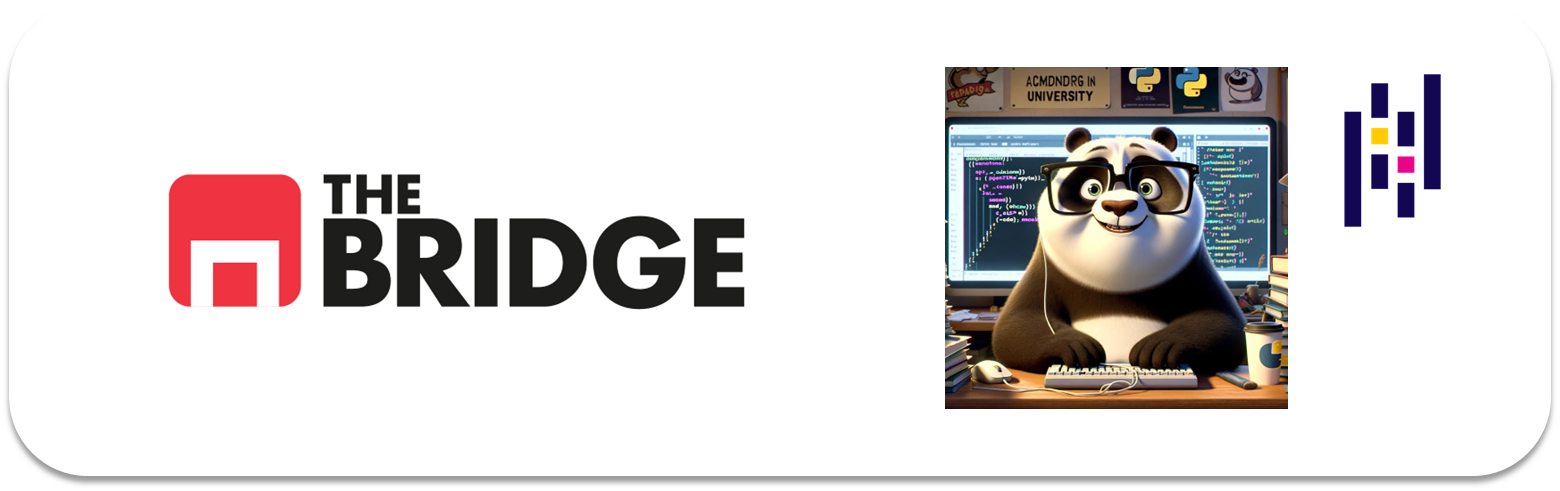

## PRACTICA OBLIGATORIA: Trabajando datos con Pandas

* La práctica obligatoria de esta unidad consiste en dos partes en las que se trabaja sobre un mismo conjunto de datos muy parecido al visto en las sesiones de trabajo personal y en la segunda unidad. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

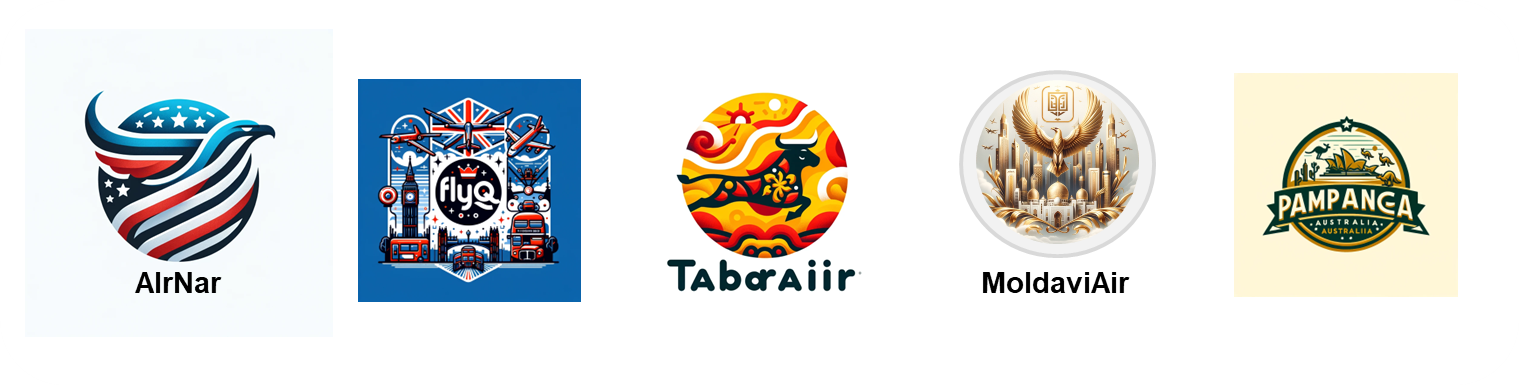

## #0 Carga de datos y primera exploración

In [ ]:
import numpy as np
import pandas as pd

df_viajes_aereos = pd.read_csv("./data/dataset_viajes.csv", index_col = "Id_vuelo")

1. Haz una primera exploración de los datos. Muestra la información general, la descripción de las variables numéricas, las columnas y muestra la distribución de datos de tres columnas escogidas por ti.

2. Si fueras el analista de datos de la empresa que tiene esta información, ¿sobre qué columna querrías saber más? [No tiene solución única, es para adelantar lo que haremos en el siguiente bloque]

## #1 Limpieza de Datos

1. Revisa los datos y contesta a las siguientes preguntas:  

    1.1 ¿Existen filas duplicadas?¿Cuántas?¿Hay alguna compañía que lo sufra más que otra o más o menos están igual?   

    1.2 ¿Hay columnas con datos faltantes o nulos? ¿Cuáles? ¿Qué porcentaje representan esos valores del total? (Pista: Para contestar a esta pregunta explora los argumentos del método `value_counts`)  

    1.3 ¿Hay alguna columna "sucia"? Es decir, ¿existe alguna columna cuyos datos tuvieramos que modificar para tener una mejor comprensión y manajeabilidad de los mismos? ¿Cuáles?  


2. Es hora de limpiar. No necesariamente seguiremos estos pasos pero primero, deshazte de las filas duplicadas. Quédate con las últimas copias.

3. Vamos con los nulos o NaN localizados en 1.2. Elimina las filas que tengan más de dos nulos, las podemos considerar demasiado ruidosas y las quitamos.

4. Ahora con los nulos en las columnas numéricas, ¿hay alguna columna que creas que puedes reconstruir completamente? ¿Cuál? 


5. Sustituye los valores nulos por valores medios en las columnas numéricas que no puedas reconstruir. Se valorará hacerlo con más precisión que utilizar la media global, ¿se te ocurre como hacerlo más preciso? 

6. En el caso de las columna no numéricas con nulos, ¿crees que puedes reconstruirlas? Si no es así, bórralas. [Se puede, pero no es sencillo]

7. Ahora sobre el `DataFrame` resultante, corrije las columnas que tengan valores "sucios" (comas equivocadas, valores extraños que no nulos, etc)

## #2 Análisis de Datos

Una vez "limpios" ya podemos analizar los datos y/o manipularlos. De hecho, nos piden que:

1. Clasifiquemos los vuelos en Larga Distancia (LD), Media Distancia (MD) y Regionales (R). Con los siguientes límites: más de 9000km, entre 1500 y 9000 kms y resto de vuelos. Añade una columna al `DataFrame` que tenga esa clasificación por vuelo.

2. Crea ahora una columna que recoja el índice de contaminación de cada viaje calculado como el consumo de keroseno por kilometro recorrdio. Llama IC a esa columna.

3. Con vistas a un futuro impuesto basado en emisiones, nos piden obtener las 3 empresas más contaminantes. Hazlo de forma manual y utilizando alguno de los métodos siguientes: [`nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html "Info sobre nlargest"), [`nsmallest`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html "Info sobre smallest") [Nota: Podemos considerar como más contaminante las que mayor IC global tiene]

4. Continuando con nuestro análisis para futuras acciones impositivas, muestra ahora las empresas más contaminantes por categoría de vuelo.

5. Obtener los destinos con vuelos más contaminantes (utiliza el IC acumulado por destino y divídelo por el número de viajes a ese destino)

6. Para cada uno de los dos destinos anteriores encuentra la compañía que más viaja a cada uno (por seperado) y la que más viaja a los dos (considerandolos juntos, es decir sumando los viajes de cada compañía a los dos). Si no has sabido hacer el apartado 5. escoge dos ciudades destino para hacer este apartado.

## #3 Ampliación y reanálisis [BONUS]

Esta parte no cuenta para la valoración de la práctica pero se recomienda encarecidamente que la INTENTES para poder sacar más provecho a la sesión en vivo. Para empezar, carga dos nuevos dataframes con una ampliación de más viajes y con más información sobre estos, respectivamente

In [ ]:
df_viajes_extra = pd.read_csv("./data/dataset_viajes_extra.csv", index_col = "Id_vuelo")
df_ingresos = pd.read_csv("./data/dataset_ingresos.csv")

1. Emplea la función [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html "info sobre pandas concat") de pandas que permite concatenar dataframes, de manera que añadas los viajes de df_viajes_extra al dataframe que hayas utilizado hasta ahora.

2. Comprueba si existen nulos en las columnas IC y todas las columnas que hayas añadido a tu dataframe previo al concat, y después del concat (utiliza info o value_counts con el argumento dropna con el valor adecuado). Tendrá que haberlos ya que el dataset de viajes extra no tenía esas columnas.

3. Calcula la columna IC para los vuelos que no la tengan informada (o sea que tengan NaN)

4. Como ya no las vamos a necesitar o bien deshazte de las columnas Origen, Destino y Duracion o create otro dataframe que conserve todas las columnas menos esa.

5. Investiga el método [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html "Info sobre joins") y después ejecuta la siguiente línea haciendo las sustituciones necesarias

In [ ]:
df_final = <tu_dataframe>.merge(df_ingresos, left_index = True, right_on = "Id_vuelo", how = "left")

6. ¿Qué columna has añadido?¿Qué le ha ocurrido al índice de filas?

7. Reconstruye el índice haciendo uso de [`set_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html#pandas.DataFrame.set_index), y de la columna "Id_vuelo".

8. Ahora que tenemos los ingresos medios por ruta:  
    8.1 Obten los ingresos por compañía totales.    
    8.2 Obten los ingresos por compañía y origen.  
    8.3 Obten los ingresos por compañía y destino.  

9. Se dice que se va a imponer un impuesto del 0.2% de los ingresos a las dos empresas más contaminantes, ¿cuánto tendrían que pagar considerando sólo los viajes de tu dataframe?

10. Dados el rumor del apartado 9, las empresas quieren saber que vuelos les rentan más y cuales menos. Suponiendo que en "ingresos" va realmente el beneficio, obten el beneficio por km de cada viaje y luego el beneficio por km. medio para cada Compañía.

11. Las empresas quieren saber más sobre sus ingresos con vistas a saber que rutas son las menos rentables y las más susceptibles de pagar impuestos:
    11.1 Obten por comapañía y ruta: ingresos totales, consumo medio, IC medio, numero de viajes (usa `agg`)
    11.2 ¿Cuáles son las dos rutas menos rentables por compañía?¿Y en total?